In [1]:
# Author: Yuki
# Datasets: Character Trait Dataset + Top 15000 Anime Dataset
# This is a notebook for analyzing, visualizing, cleaning, merging of our datasets

### Loads the dataset and checks info

In [2]:
import pandas as pd

df = pd.read_csv("Anime_Traits.csv")

In [3]:
df.head()

,Id,Names,Hair_Color,Gender,Tags,Anime,Manga
0,0,L,Black Hair,Male,"['Analytical', 'Barefoot', 'Detective', 'Eye B...","['Death Note', 'Death Note Rewrite 1: Visions ...","['Death Note', 'Death Note: L Change the World..."
1,1,Kakashi HATAKE,Grey Hair,Male,"['Adult', 'Anti-Gravity Hair', 'Beastmaster', ...","['Boruto: Naruto Next Generations', 'Boruto: N...",['Boruto: Naruto the Movie Tokubetsu Bangai-he...
2,2,Edward ELRIC,Blonde Hair,Male,"['Alchemist', 'Arm Blades', 'Artificial Limb',...","['Fullmetal Alchemist', 'Fullmetal Alchemist: ...","['Fullmetal Alchemist', 'Fullmetal Alchemist G..."
3,3,Levi,Black Hair,Male,"['Adult', 'Military', 'Ruthless', 'Stoic', 'Sw...","['Attack on Skytree', 'Attack on Titan', 'Atta...","['Attack on Titan', 'Attack on Titan: Junior H..."
4,4,Light YAGAMI,Brown Hair,Male,"['Analytical', 'Big Ego', 'Charismatic', 'God ...","['Death Note', 'Death Note Rewrite 1: Visions ...",['Death Note']


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119825 entries, 0 to 119824
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Id          119825 non-null  int64 
 1   Names       119824 non-null  object
 2   Hair_Color  96059 non-null   object
 3   Gender      113212 non-null  object
 4   Tags        119391 non-null  object
 5   Anime       104426 non-null  object
 6   Manga       35540 non-null   object
dtypes: int64(1), object(6)
memory usage: 6.4+ MB


In [5]:
df.describe(include='all')

,Id,Names,Hair_Color,Gender,Tags,Anime,Manga
count,119825.000000,119824,96059,113212,119391,104426,35540
unique,NaN,96411,634,7,58848,20170,6052
top,NaN,Narrator,Brown Hair,Male,['Adult'],['One Piece'],['One Piece']
freq,NaN,151,25576,62063,3132,625,669
mean,60575.813979,NaN,NaN,NaN,NaN,NaN,NaN
std,35331.953739,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,29986.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,60177.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,90877.000000,NaN,NaN,NaN,NaN,NaN,NaN


### Remove unusable rows that miss important info for character generation

In [6]:
important_col = ['Tags', 'Anime']

# Select only the important columns
important_df = df[important_col]

# Check for null values in these columns
isnull_important = important_df.isnull()

# Select the rows where all important columns are null
all_null_mask = isnull_important.all(axis=1)
all_null_rows = df[all_null_mask]

all_null_rows

,Id,Names,Hair_Color,Gender,Tags,Anime,Manga
2114,2114,Evangelion Unit 01,Evangelion: 2.0 You Can (Not) Advance,NaN,NaN,NaN,NaN
3847,3847,Evangelion Unit 02,Evangelion: 3.0 You Can (Not) Redo,NaN,NaN,NaN,NaN
4315,4315,Evangelion Unit 00,Evangelion: 2.0 You Can (Not) Advance,NaN,NaN,NaN,NaN
14155,14160,Narrator,Pokemon Advanced,NaN,NaN,NaN,NaN
14678,14683,Evangelion Unit 03,Neon Genesis Evangelion,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
119507,122997,Tetsunosuke,B-Legend! Battle B-Daman Fire Spirits!,NaN,NaN,NaN,NaN
119513,123005,West,Denkou Chou Tokkyuu Hikarian,NaN,NaN,NaN,NaN
119703,123220,Rita,Dirty Pair: Project Eden,NaN,NaN,NaN,NaN
119704,123222,Miraruda,Dirty Pair: Project Eden,NaN,NaN,NaN,NaN


In [7]:
# Get the index of the rows to drop
indices_to_drop = all_null_rows.index

df_cleaned = df.drop(indices_to_drop)

print(f"Shape of DataFrame after dropping: {df_cleaned.shape}")

# Update the main DataFrame 'df' with the cleaned version
df = df_cleaned

Shape of DataFrame after dropping: (119391, 7)


In [8]:
df.to_pickle('df_cleaned_missing_tag_and_anime.pkl')

## Keeping the rows that match the anime titles included in Top 15000 Anime Dataset. 

### Converting the Anime titles into a list

In [ ]:
# importing the ast module
import ast

def safe_eval(val):
    try:
        # ast.literal_eval() converts a string to a Python list
        return ast.literal_eval(val)
    except (ValueError, SyntaxError):
        return None 
        
# Converts the anime titles in the Anime column then enter them into Anime_List column 
df['Anime_List'] = df['Anime'].apply(safe_eval)

In [10]:
# Checks how many rows failed to be converted into a list
failed_rows = df[df['Anime_List'].isnull()]
failed_rows.shape

(14965, 8)

In [11]:
# Checks how many rows are null within these failed rows
anime_missing = failed_rows[failed_rows['Anime'].isnull()]
anime_missing

,Id,Names,Hair_Color,Gender,Tags,Anime,Manga,Anime_List
381,381,Truck-kun,A Dark Rabbit Has Seven Lives,NaN,"['1-nen A-gumi no Monster', 'Accomplishments o...",NaN,NaN,None
1584,1584,Hyourinmaru,Turquoise Hair,Male,['Bleach'],NaN,NaN,None
1802,1802,Sode no Shirayuki,White Hair,Female,['Bleach'],NaN,NaN,None
1849,1849,Misty's Togepi,NaN,NaN,"['Pokemon', 'Pokemon Advanced', 'Pokemon: Camp...",NaN,NaN,None
2529,2529,Tachikoma,Robot,NaN,"['Ghost in the Shell: SAC_2045', 'Ghost in the...",NaN,NaN,None
...,...,...,...,...,...,...,...,...
119813,123357,Kitajima,Black Hair,Male,['A Town Where You Live (2014)'],NaN,NaN,None
119814,123358,Nakashiki,Brown Hair,Female,['A Town Where You Live (2014)'],NaN,NaN,None
119818,123367,Narrator,NaN,Male,['Gasshin Sentai Mechander Robo'],NaN,NaN,None
119820,123369,Narrator,NaN,Male,['Gold Lightan: Golden Warrior'],NaN,NaN,None


In [12]:
# Only keep the ones that have anime titles in Anime_List column and reindex the dataframe
df = df[df['Anime_List'].notnull()].reset_index(drop=True)

In [13]:
current_length = df.shape[0]
current_length

104426

In [14]:
df.to_pickle('df_cleaned_null_anime.pkl')

## Merge the Character Trait dataset with Top15000 Anime dataset

### Load Top 15000 Anime Dataset

In [15]:
top15000_df = pd.read_csv('top_anime_dataset_cleaned_inappropriate_rows.csv')

In [16]:
top15000_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13272 entries, 0 to 13271
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   anime_id        13272 non-null  int64  
 1   anime_url       13272 non-null  object 
 2   image_url       13272 non-null  object 
 3   name            13272 non-null  object 
 4   english_name    7738 non-null   object 
 5   japanese_names  13229 non-null  object 
 6   score           13272 non-null  float64
 7   genres          11743 non-null  object 
 8   themes          9436 non-null   object 
 9   demographics    4265 non-null   object 
 10  synopsis        13272 non-null  object 
 11  type            13271 non-null  object 
 12  episodes        13210 non-null  float64
 13  premiered       4612 non-null   object 
 14  producers       8344 non-null   object 
 15  studios         11072 non-null  object 
 16  source          13272 non-null  object 
 17  duration        13272 non-null 

In [17]:
original_top_anime_length = top15000_df.shape[0]
original_top_anime_length

13272

In [18]:
# Create a new column with english_name if available, else fallback to name
top15000_df['Merged_Title'] = top15000_df['english_name'].fillna(top15000_df['name'])
# Removes spaces and lower-case them 
top15000_df['Cleaned_Title'] = top15000_df['Merged_Title'].str.strip().str.lower()

In [19]:
# Create a trimmed synopsis_df using these cleaned values
synopsis_df = top15000_df[['Merged_Title', 'synopsis', 'Cleaned_Title']].copy()

### Create the dataframe where each anime title is in 1 row

In [20]:
# .explode() can transform each element of a list-like to a row, replicating index values. 
df_exploded = df.explode('Anime_List').reset_index(drop=True)

In [21]:
df_exploded

,Id,Names,Hair_Color,Gender,Tags,Anime,Manga,Anime_List
0,0,L,Black Hair,Male,"['Analytical', 'Barefoot', 'Detective', 'Eye B...","['Death Note', 'Death Note Rewrite 1: Visions ...","['Death Note', 'Death Note: L Change the World...",Death Note
1,0,L,Black Hair,Male,"['Analytical', 'Barefoot', 'Detective', 'Eye B...","['Death Note', 'Death Note Rewrite 1: Visions ...","['Death Note', 'Death Note: L Change the World...",Death Note Rewrite 1: Visions of a God
2,0,L,Black Hair,Male,"['Analytical', 'Barefoot', 'Detective', 'Eye B...","['Death Note', 'Death Note Rewrite 1: Visions ...","['Death Note', 'Death Note: L Change the World...",Death Note Rewrite 2: L's Successors
3,1,Kakashi HATAKE,Grey Hair,Male,"['Adult', 'Anti-Gravity Hair', 'Beastmaster', ...","['Boruto: Naruto Next Generations', 'Boruto: N...",['Boruto: Naruto the Movie Tokubetsu Bangai-he...,Boruto: Naruto Next Generations
4,1,Kakashi HATAKE,Grey Hair,Male,"['Adult', 'Anti-Gravity Hair', 'Beastmaster', ...","['Boruto: Naruto Next Generations', 'Boruto: N...",['Boruto: Naruto the Movie Tokubetsu Bangai-he...,Boruto: Naruto the Movie
...,...,...,...,...,...,...,...,...
175109,123366,Pyonkichi,NaN,Male,"['Animal', 'Frog']","['Dokonjou Gaeru', 'Shin Dokonjou Gaeru', 'Shi...",['The Gutsy Frog'],Shin Dokonjou Gaeru: Dokonjou Yumemakura
175110,123368,Gideon LEE,Brown Hair,Male,"['Facial Hair', 'Glasses']",['The Good Witch of the West'],NaN,The Good Witch of the West
175111,123370,Aoi,Purple Hair,Female,"['Editor', 'Hair Antenna']",['Kemeko Deluxe!'],['Kemeko DX!'],Kemeko Deluxe!
175112,123371,Kiriko,Black Hair,Female,"['Eye Patch', 'Robot', 'Rosy Cheeks']",['Kemeko Deluxe!'],['Kemeko DX!'],Kemeko Deluxe!


In [22]:
# clean up the titles after exploded so that they are lower-case without any unnecessary spaces
df_exploded['Cleaned_Anime_Title'] = df_exploded['Anime_List'].str.strip().str.lower()

In [23]:
merged_df = df_exploded.merge(
    synopsis_df,
    left_on='Cleaned_Anime_Title',
    right_on='Cleaned_Title',
    how='left' # use 'left' since we want to keep all characters even if unmatched
)

In [24]:
merged_df.shape

(176464, 12)

### Remove the rows where synopsis is missing

In [25]:
# Find unmatched rows:
unmatched = merged_df[merged_df['synopsis'].isnull()]
unmatched.tail(5)

,Id,Names,Hair_Color,Gender,Tags,Anime,Manga,Anime_List,Cleaned_Anime_Title,Merged_Title,synopsis,Cleaned_Title
176452,123353,Gorou,Brown Hair,NaN,"['Animal', 'Dog']",['Koroshiya-san: The Hired Gun'],['Koroshiya-san'],Koroshiya-san: The Hired Gun,koroshiya-san: the hired gun,NaN,NaN,NaN
176453,123354,Guan Yu,Black Hair,NaN,"['Animal', 'Cat']",['Kremlin'],['KРΣМЛЬ'],Kremlin,kremlin,NaN,NaN,NaN
176454,123355,Haruo KYATTSUYAMA,Brown Hair,Male,['Hat'],['Kremlin'],['KРΣМЛЬ'],Kremlin,kremlin,NaN,NaN,NaN
176455,123359,Rajibo,Multicolored Hair,Male,"['Animal', 'Cat', 'Glasses']",['Komaneko’s Christmas: The Lost Gift'],NaN,Komaneko’s Christmas: The Lost Gift,komaneko’s christmas: the lost gift,NaN,NaN,NaN
176456,123360,Koume,Black Hair,Female,"['Rosy Cheeks', 'Salaryman']",['Koume-chan ga Iku!'],"['Koume-chan ga Iku!!', 'Koume-chan ga Iku!! R']",Koume-chan ga Iku!,koume-chan ga iku!,NaN,NaN,NaN


In [26]:
# Number of rows where the synopsis is absent
synopsis_null = merged_df[merged_df['synopsis'].isnull()]
synopsis_null.shape

(95216, 12)

In [27]:
# Number of characters exist among the ones where the synopsis is present
synopsis_not_null = merged_df[merged_df['synopsis'].notnull()]
synopsis_not_null['Names'].unique().shape

(51486,)

In [28]:
# Number of unique anime titles among the ones where the synopsis is present
synopsis_not_null = merged_df[merged_df['synopsis'].notnull()]
synopsis_not_null['Anime_List'].unique().shape

(4440,)

In [29]:
synopsis_not_null.shape # Number of rows with synopsis

(81248, 12)

In [30]:
# Only keeps the rows with synopsis as training_df
training_df = merged_df[merged_df['synopsis'].notnull()].reset_index(drop=True)

In [31]:
training_df.shape

(81248, 12)

## Removing Null Values in Hair_Color, Gender, and Tags

In [32]:
missing_gender = training_df[training_df['Gender'].isnull()]
missing_gender.shape

(1669, 12)

In [33]:
# Only keeps the rows with gender
training_df = training_df[training_df['Gender'].notnull()].reset_index(drop=True)

In [34]:
missing_hair_color = training_df[training_df['Hair_Color'].isnull()]
missing_hair_color.shape

(8524, 12)

In [35]:
# Only keeps rows with hair color
training_df = training_df[training_df['Hair_Color'].notnull()].reset_index(drop=True)

In [36]:
missing_tags = training_df[training_df['Tags'].isnull()]
missing_tags.shape

(0, 12)

In [37]:
training_df['Tags'].apply(lambda x: isinstance(x, list) and len(x) > 0).value_counts()

Tags
False    71055
Name: count, dtype: int64

In [38]:
bad_tags_df = training_df[~training_df['Tags'].apply(lambda x: isinstance(x, list) and len(x) > 0)]
bad_tags_df['Tags'][0]

"['Analytical', 'Barefoot', 'Detective', 'Eye Bags', 'Sweet Tooth']"

### Converts the tags into Python lists
Using the same ast.literal_eval() I used earlier, I convert the strings into Python lists

In [39]:
import ast

def parse_tags(x):
    try:
        return ast.literal_eval(x) if isinstance(x, str) else x
    except:
        return []

In [40]:
# Apply the above function to each tag entries
training_df['Tags'] = training_df['Tags'].apply(parse_tags)

In [41]:
# Keeps only the rows where the tags is present
training_df = training_df[training_df['Tags'].apply(lambda x: len(x) > 0)].reset_index(drop=True)

In [42]:
training_df.shape

(71055, 12)

In [43]:
training_df.to_pickle('df_cleaned_null_gender_hair_tags.pkl')

## Names Column Distribution

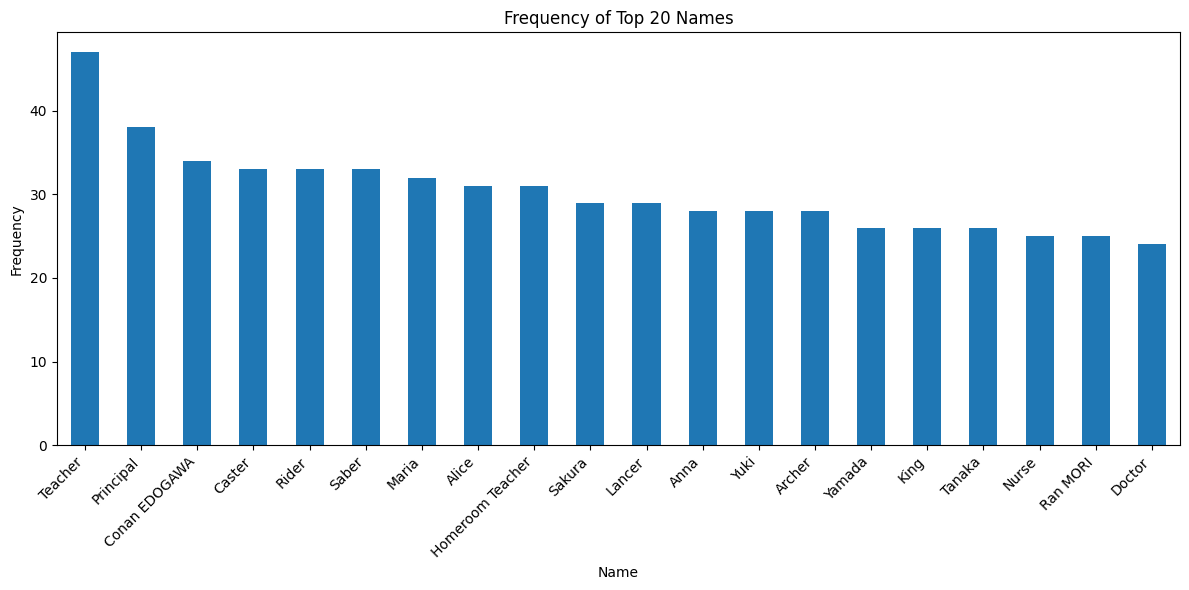

In [44]:
import matplotlib.pyplot as plt

# Get the value counts of the 'Names' column
name_counts = training_df['Names'].value_counts().head(20) # Get the top 20 names

# Create a bar plot
plt.figure(figsize=(12, 6))
name_counts.plot(kind='bar')
plt.title('Frequency of Top 20 Names')
plt.xlabel('Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [45]:
name_counts = training_df['Names'].value_counts()
name_counts.shape

(45010,)

In [46]:
top_100_names = training_df['Names'].value_counts().head(100).index.tolist()
print(*top_100_names, sep=", ")

Teacher, Principal, Conan EDOGAWA, Caster, Rider, Saber, Maria, Alice, Homeroom Teacher, Sakura, Lancer, Anna, Yuki, Archer, Yamada, King, Tanaka, Nurse, Ran MORI, Doctor, Miki, Berserker, Old Man, Yuri, Genta KOJIMA, Kei, Mitsuhiko TSUBURAYA, Shin, Ayumi YOSHIDA, Master, Maki, Suzuki, Rin, Assassin, Ai, Nobunaga ODA, Sarah, Leo, Marie, Mina, Lucifer, Misaki, Yuu, Mother, Lily, Goku SON, Michael, Haruka, Tama, Grandma, Hana, Kuro, Kagura, Kogoro MORI, Hiroshi AGASA, Rei, Kiki, Captain, Mao, Char AZNABLE, Hiro, Manager, Mari, Saito, Loki, Sora, Ishikawa, Suzu, Kai, Gin, President, Shiro, Freya, Bartender, Mimi, Mary, Ryu, Girl, Landlady, Sonoko SUZUKI, Shinnosuke NOHARA, Mai, Makoto, Sara, Waitress, Jin, Ayame, Reporter, Mika, Tsubaki, Mayu, Maetel, Sakuya, Akira, Rose, Boy, Kobayashi, Naomi, Sasaki, Kana


In [47]:
# List of names to inspect
names_to_remove = ['Teacher', 'Principal', 'Homeroom Teacher','Nurse', 'Old Man', 'Old Women','Doctor', 'Master','Assassin',
                   'Mother', 'Father','Granma', 'Granpa', 'Manager', 'Captain', 'President','Bartender', 'Landlady', 'Girl', 'Boy', 
                   'Reporter', 'Waitress', 'Director', 'Mayor', 'Maid']

# Select the rows where 'Names' is in the list to inspect
rows_to_delete = training_df[training_df['Names'].isin(names_to_remove)]
rows_to_delete

,Id,Names,Hair_Color,Gender,Tags,Anime,Manga,Anime_List,Cleaned_Anime_Title,Merged_Title,synopsis,Cleaned_Title
4261,1839,Assassin,Purple Hair,Male,"[Historical Figure, Honorable Fighter, Immorta...","['Carnival Phantasm', 'Fate/stay night', ""Fate...","['Fate/Grand Order Comic Anthology STAR', 'Fat...",Carnival Phantasm,carnival phantasm,Carnival Phantasm,The Carnival Moment is a time when several nar...,carnival phantasm
4262,1839,Assassin,Purple Hair,Male,"[Historical Figure, Honorable Fighter, Immorta...","['Carnival Phantasm', 'Fate/stay night', ""Fate...","['Fate/Grand Order Comic Anthology STAR', 'Fat...",Fate/stay night,fate/stay night,Fate/stay night,"After a mysterious inferno kills his family, S...",fate/stay night
4263,1839,Assassin,Purple Hair,Male,"[Historical Figure, Honorable Fighter, Immorta...","['Carnival Phantasm', 'Fate/stay night', ""Fate...","['Fate/Grand Order Comic Anthology STAR', 'Fat...",Fate/stay night: Unlimited Blade Works,fate/stay night: unlimited blade works,Fate/stay night: Unlimited Blade Works,"In Fuyuki City, the Fifth Holy Grail War is ab...",fate/stay night: unlimited blade works
4351,1896,Father,Black Hair,Male,"[Adult, Bookworm, Facial Hair, Werewolf]",['Wolf Children'],['Wolf Children: Ame & Yuki'],Wolf Children,wolf children,Wolf Children,"Hana, a hard-working college student, falls in...",wolf children
4996,2213,Girl,Brown Hair,Female,[Barefoot],"['Clannad', 'Clannad After Story']",NaN,Clannad,clannad,Clannad,Tomoya Okazaki is a delinquent who finds life ...,clannad
...,...,...,...,...,...,...,...,...,...,...,...,...
70473,120050,Nurse,Black Hair,Female,"[Adult, Hat, Nurse]",['Honey and Clover'],['Honey and Clover'],Honey and Clover,honey and clover,Honey and Clover,"Yuuta Takemoto, a sophomore at an arts college...",honey and clover
70489,120181,Reporter,Brown Hair,Female,[Reporter],['Tiger & Bunny'],NaN,Tiger & Bunny,tiger & bunny,Tiger & Bunny,"In Stern Bild City, those with special abiliti...",tiger & bunny
70702,121217,Reporter,Blonde Hair,Male,[Reporter],['Flag'],NaN,Flag,flag,Flag,"In 20xx, a civil war broke out in a small coun...",flag
70734,121490,Reporter,Brown Hair,Male,"[Adult, Reporter]",['Symphogear G'],NaN,Symphogear G,symphogear g,Symphogear G,Three months after a Lunar Attack which nearly...,symphogear g


In [48]:
# Drop the rows from the original DataFrame 'df'
indices_to_drop = rows_to_delete.index
df_cleaned_generic = training_df.drop(indices_to_drop)

print(f"Shape of DataFrame after deletion: {df_cleaned_generic.shape}")

# Update your main DataFrame 'df' with the cleaned version
training_df = df_cleaned_generic

Shape of DataFrame after deletion: (70628, 12)


### Remove the rows with role names in Fate franchise 

In [49]:
# List of Fate class roles
fate_roles = ['saber', 'lancer', 'archer', 'rider', 'caster', 'assassin', 'berserker', 'ruler', 'avenger', 'alter ego', 'moon cancer', 'foreigner', 'beast']

# Filter dataframe
filtered_df = df[
    df['Names'].str.lower().isin(fate_roles) & 
    df['Anime'].str.lower().str.contains('fate')
]

In [50]:
filtered_df

,Id,Names,Hair_Color,Gender,Tags,Anime,Manga,Anime_List
91,91,Saber,Blonde Hair,Female,"['Armor', 'Braids', 'Gloves', 'Hair Antenna', ...","['Carnival Phantasm', 'Carnival Phantasm: EX S...",['All Around Type-Moon: Ahnenerbe no Nichijou'...,"[Carnival Phantasm, Carnival Phantasm: EX Seas..."
280,280,Archer,White Hair,Male,"['Amnesia', 'Archer', 'Dark-skinned', 'Dual Wi...","['Carnival Phantasm', ""Carnival Phantasm: Illy...",['All Around Type-Moon: Ahnenerbe no Nichijou'...,"[Carnival Phantasm, Carnival Phantasm: Illya's..."
512,513,Rider,Red Hair,Male,"['Armor', 'Breathtaking Beard', 'Cape', 'Chari...","['Carnival Phantasm', 'Fate/Extella OP', 'Fate...","['Fate/Grand Order: Turas Réalta', 'Fate/Ixtel...","[Carnival Phantasm, Fate/Extella OP, Fate/Gran..."
1073,1074,Lancer,Blue Hair,Male,"['Bloodthirsty', 'Immortal', 'Lancer', 'Magica...","['Carnival Phantasm', 'Carnival Phantasm: EX S...",['All Around Type-Moon: Ahnenerbe no Nichijou'...,"[Carnival Phantasm, Carnival Phantasm: EX Seas..."
1088,1089,Lancer,Black Hair,Male,"['Dual Wielder', 'Honorable Fighter', 'Immorta...","['Fate/Grand Carnival', 'Fate/Grand Order: Fif...","['Fate/Grand Order Comic Anthology STAR', 'Fat...","[Fate/Grand Carnival, Fate/Grand Order: Fifth ..."
...,...,...,...,...,...,...,...,...
98713,113695,Rider,White Hair,Male,"['Balding', 'Facial Hair', 'Historical Figure'...",['Fate/Grand Order x Himuro no Tenchi: 7-nin n...,NaN,[Fate/Grand Order x Himuro no Tenchi: 7-nin no...
98798,113811,Caster,White Hair,Male,"['Analytical', 'Dark-skinned', 'Glasses', 'Glo...",['Fate/Grand Order: Cosmos in the Lostbelt - L...,NaN,[Fate/Grand Order: Cosmos in the Lostbelt - Lo...
98952,114009,Berserker,White Hair,Male,"['Barefoot', 'Dark-skinned', 'Deity', 'Horns',...",['Fate/Grand Order: Cosmos in the Lostbelt - L...,NaN,[Fate/Grand Order: Cosmos in the Lostbelt - Lo...
98954,114011,Rider,White Hair,Male,"['Cape', 'Immortal', 'Magical Familiar', 'Mech...",['Fate/Grand Order: Cosmos in the Lostbelt - L...,NaN,[Fate/Grand Order: Cosmos in the Lostbelt - Lo...


In [51]:
df.drop(filtered_df.index, inplace=True)

In [52]:
training_df.to_pickle('df_cleaned_generic1.pkl')

### Run the same code again to find more

In [53]:
name_counts = training_df['Names'].value_counts()
name_counts

Names
Conan EDOGAWA          34
Rider                  33
Saber                  33
Caster                 33
Maria                  32
                       ..
Ryuk                    1
Fumimaro AYANOKOUJI     1
Keiko SHIRATORO         1
Lover                   1
Azuma IRIKI             1
Name: count, Length: 44988, dtype: int64

In [54]:
top_100_names = training_df['Names'].value_counts().head(100).index.tolist()
print(*top_100_names, sep=", ")

Conan EDOGAWA, Rider, Saber, Caster, Maria, Alice, Lancer, Sakura, Anna, Yuki, Archer, Yamada, Tanaka, King, Ran MORI, Miki, Berserker, Yuri, Kei, Shin, Genta KOJIMA, Mitsuhiko TSUBURAYA, Maki, Ayumi YOSHIDA, Rin, Suzuki, Ai, Mina, Sarah, Marie, Leo, Nobunaga ODA, Yuu, Lucifer, Misaki, Michael, Haruka, Lily, Goku SON, Grandma, Hana, Rei, Tama, Hiroshi AGASA, Kogoro MORI, Kuro, Kagura, Sora, Mao, Mari, Kiki, Saito, Hiro, Char AZNABLE, Loki, Ryu, Kai, Mary, Sonoko SUZUKI, Shiro, Shinnosuke NOHARA, Ishikawa, Mimi, Gin, Freya, Suzu, Tsubaki, Jin, Sara, Mayu, Mika, Ayame, Makoto, Mai, Hitomi, John, Toshizou HIJIKATA, Kana, Maetel, Haru, Masamune DATE, Amuro RAY, Yui, Nami, Lala, Miyako, Sakamoto, Naomi, Chris, Sasaki, Akira, Rose, Kobayashi, Sakuya, Ran, Satou, David, Watanabe, Nakamura, Takahashi


In [55]:
missing_names = training_df[training_df['Names'].isnull()]
missing_names

,Id,Names,Hair_Color,Gender,Tags,Anime,Manga,Anime_List,Cleaned_Anime_Title,Merged_Title,synopsis,Cleaned_Title
34543,31278,NaN,Blonde Hair,Female,"[Child, Child Prodigy, Elementary School Stude...","['Null & Peta', 'Null & Peta Special']",NaN,Null & Peta,null & peta,Null & Peta,Genius inventor Null tragically loses her olde...,null & peta


## Hair Color Column Distribution

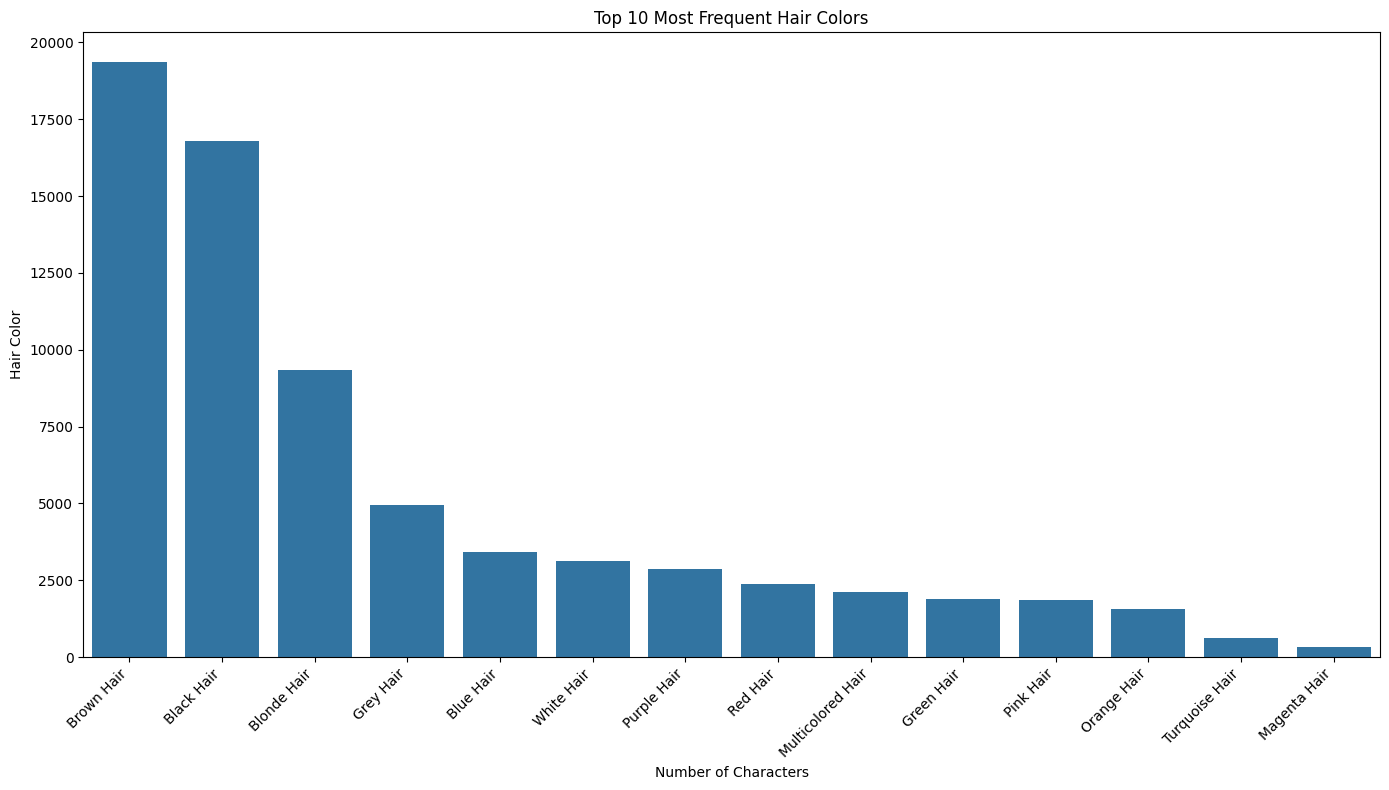

In [56]:
# import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

hair_color_counts = training_df['Hair_Color'].value_counts()


top_10_hair_colors = hair_color_counts.head(20)

plt.figure(figsize=(14,8))
sns.countplot(training_df, x="Hair_Color", order=top_10_hair_colors.index)
plt.xticks(rotation=45, ha='right')  
plt.title(f'Top 10 Most Frequent Hair Colors')
plt.xlabel('Number of Characters')
plt.ylabel('Hair Color')
plt.tight_layout()
plt.show()

In [57]:
hair_color_counts = training_df['Hair_Color'].value_counts()
hair_color_counts

Hair_Color
Brown Hair           19359
Black Hair           16776
Blonde Hair           9355
Grey Hair             4941
Blue Hair             3427
White Hair            3129
Purple Hair           2882
Red Hair              2377
Multicolored Hair     2129
Green Hair            1887
Pink Hair             1854
Orange Hair           1573
Turquoise Hair         623
Magenta Hair           316
Name: count, dtype: int64

## Handling Unnecessary text in Synopsis

In [58]:
mal_rewrite_count = training_df['synopsis'].str.contains(r'\[Written by MAL Rewrite\]').sum()
print(f"Rows with '[Written by MAL Rewrite]': {mal_rewrite_count}")

Rows with '[Written by MAL Rewrite]': 44748


In [59]:
training_df.shape

(70628, 12)

In [60]:
# Using regex, replace the text with '' and clean up possible white spaces, newlines, etc
training_df['synopsis'] = training_df['synopsis'].str.replace(r'\[Written by MAL Rewrite\]', '', regex=True)
training_df['synopsis'] = training_df['synopsis'].str.replace(r'\n{2,}', '\n\n', regex=True).str.strip()

In [61]:
# Verify that they are removed
mal_rewrite_count = training_df['synopsis'].str.contains(r'\[Written by MAL Rewrite\]').sum()
print(f"Rows with '[Written by MAL Rewrite]': {mal_rewrite_count}")

Rows with '[Written by MAL Rewrite]': 0


In [62]:
# Using regex, replace the text with '' and clean up possible white spaces, newlines, etc
training_df['synopsis'] = training_df['synopsis'].str.replace(r'\(Source:.*?\)', '', regex=True)
training_df['synopsis'] = training_df['synopsis'].str.replace(r'\n{2,}', '\n\n', regex=True).str.strip()

In [63]:
training_df.to_pickle('df_cleaned_synopsis.pkl')

In [64]:
training_df.shape

(70628, 12)